# Defining the Question

## a). Specifying the Question



> Mchezapoa Ltd have hired me as a football analyst. They want me to predict the number of goals scored by home teams and away teams. Specifically they'd want a prediction of the home team and away team goals. I'll also figure out the home team's perspective of a win, lose or draw.





## b). Defining the metric for success



> The research will be viewed successful if the model could make a prediction of at least 80%



## c). Understanding the Context



> The men's FIFA World Ranking is a ranking system for men's national teams in association football. The research consists of 2 datasets; a ranking dataset and a results one.

> Ranking has been changing over the years. The current method of calculation is the Elo method


> The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual matches to/from a team’s existing point total. The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams
higher in the ranking should fare better against teams lower in the ranking.


> The study is meant to predict the number of scores made by both the away team and home teams.







## d). Recording the Experimental Design



> Indented block
Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:
 Load data and preview preliminary characteristics of the dataset

1.   Data cleaning 

2.   Perform univariate and bivariate analysis

3.   Modelling (checking multicollinearity, cross validation, RMSE, Assessing heteroscedasticity)

4. Making predictions



# Reading the Data

We have 2 sets of data provided by Mchezopesa Ltd. The first one is fifa ranking and the other one is a results dataset.

In [313]:
#Importing the libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl                        
                
import itertools
import datetime as dt                           
from scipy import stats  

from IPython.display import display             
import warnings                                 
warnings.filterwarnings('ignore') 
import os                                       
import gc

In [314]:
#Reading the data
fifa_ranking = pd.read_csv("/content/fifa_ranking.csv")
results = pd.read_csv("/content/results.csv")

# Checking the Data

In [315]:
#We'll check the shape of the 2 datasets
print('fifa_ranking shape: {} Rows, {} Columns'.format(*fifa_ranking.shape))
print('results shape: {} Rows, {} Columns'.format(*results.shape))

fifa_ranking shape: 57793 Rows, 16 Columns
results shape: 40839 Rows, 9 Columns


In [316]:
#Previewing the head of the fifa ranking dataset
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [317]:
#Previewing the head of the results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [318]:
#Previwing the tail of the fifa ranking dataset
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [319]:
#Previwing the tail of the results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


# Tidying the Dataset

In [320]:
#Dropping any duplicates
df_ranking = fifa_ranking.drop_duplicates()
df_results = results.drop_duplicates()

In [321]:
#Assuming that Month and year will be necessary to the study and so we'll extract them

df_ranking['year'] = pd.DatetimeIndex(df_ranking['rank_date']).year
df_ranking['month'] = pd.DatetimeIndex(df_ranking['rank_date']).month

In [322]:
#Doing the same for the results dataset
df_results['year'] = pd.DatetimeIndex(df_results['date']).year
df_results['month'] = pd.DatetimeIndex(df_results['date']).month

In [323]:
#Joining the 2 datasets on the year and month column
df_ball=df_results.merge( df_ranking,left_on=['year', 'month'], right_on=['year', 'month'],how='inner')

df_ball.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [324]:
df_ball.shape

(4291108, 27)

In [325]:
df_ball.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month', 'rank',
       'country_full', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

In [326]:
#Dropping unnecesarry columns
df_ball = df_ball.drop(['date', 'country_abrv' ], axis=1)

I dropped these because I deemed them unnecessary. However, more will be dropped as I continue working on the notebook.

In [327]:
#Checking for missing values
df_ball.isnull().sum()

home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
year                       0
month                      0
rank                       0
country_full               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no missing values.

In [328]:
#checking if the dataset has the necessary data types
df_ball.dtypes

home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
country                     object
neutral                       bool
year                         int64
month                        int64
rank                         int64
country_full                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

Text(0.5, 1.0, 'Box plot of total points')

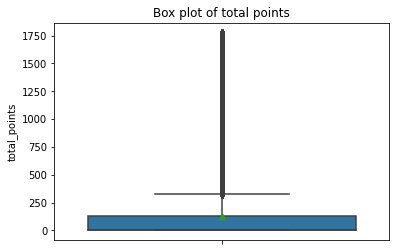

In [329]:
#Checking for outliers
sns.boxplot(df_ball["total_points"], showmeans=True, orient='vert')
plt.title('Box plot of total points')

I decided not to deal with any outlier since they were recorded points and it was expected for them to differ

## Feature Engineering

In [330]:
#Creating a hometeam_rank & awayteam_ranks column
#home_team = df_ball[df_ball.home_team == df_ball.country]

df1 = df_ball[df_ball['home_team'] == df_ball['country_full']]
df2 = df_ball[df_ball['away_team'] == df_ball['country_full']]



> The point of the codes down below is to try and get 2 rank columns, 1 for each team i.e away team and home team. First thing done was to get the away team and home team datasets separately.



In [331]:
df1.shape

(18593, 25)

In [332]:
df1.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'rank', 'country_full',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [333]:
df2.shape

(18502, 25)

In [334]:
#Dropping unnecessary columns
df1 = df1.drop(['city', 'country', 'neutral', 'month', 'country_full', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
         'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
         'three_year_ago_weighted', 'confederation', 'rank_date'], axis=1)

In [335]:
df2.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'rank', 'country_full',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [336]:
df2 = df2.drop(['city', 'country', 'neutral', 'month', 'country_full', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 
                'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
                'three_year_ago_weighted', 'confederation', 'rank_date'], axis=1)



> At this point I decided to drop the columns that I saw were unnecessary. My assumption is that wherever a match is played won't have much effect on the game's result and so I dropped the city and country coulumn. They also have so many records and dealing with them will be hectic if we try and convert them to values while modelling. The same also applies to year since it runs from 1872 to 2019. Since we were already creating a rank column for each team, rank_change wasn't necessary. All the average and weighted columns were dropped since I already had the total points column. I dropped rank date and confederation since I had the month and tournament respectively.



In [337]:
# Merging both the away team and home team
new_df = pd.merge(df1, df2, how = 'left', left_on = ['home_team', 'away_team', 'tournament', 'year', 'home_score', 'away_score'],\
                  right_on = ['home_team', 'away_team', 'tournament', 'year', 'home_score', 'away_score'])

In [338]:
new_df.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_x,rank_y
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,19,67.0
1,Peru,Argentina,0,1,FIFA World Cup qualification,1993,70,5.0
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,22,35.0
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,94,8.0
4,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,58,25.0


In [339]:
#Renaming the columns
new_df = new_df.rename(columns={'rank_x' : 'home_rank', 'rank_y' : 'away_rank'})
new_df.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,19,67.0
1,Peru,Argentina,0,1,FIFA World Cup qualification,1993,70,5.0
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,22,35.0
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,94,8.0
4,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,58,25.0


In [340]:
# Creating a function to be used to create a win, draw or lose column (status)
#The code minuses the away score from the home score so as to see the difference
#A negative result shows lose, a positive is a win while 0 is a draw
new_df['score'] = new_df.home_score - new_df.away_score

def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
#
new_df['result'] = new_df.score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose of creating the status column
#
new_df.drop('score', axis = 1, inplace = True)


# Previewing to see if there's change 
new_df.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank,result
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,19,67.0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,1993,70,5.0,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,22,35.0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,94,8.0,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,58,25.0,Draw


In [341]:
#Changing the result name column to status
new_df
new_df = new_df.rename(columns={'result' : 'status'})
new_df.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank,status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,19,67.0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,1993,70,5.0,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,1993,22,35.0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,1993,94,8.0,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,1993,58,25.0,Draw


In [342]:
new_df.isnull().sum()

home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
year             0
home_rank        0
away_rank     1773
status           0
dtype: int64

In [343]:
# I'll Fill missing values with mean column values since they're a lot and might make me lose valuable data
new_df.fillna(new_df.mean(), inplace=True)
# Count the number of NaN values in each column
print(new_df.isnull().sum())

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
year          0
home_rank     0
away_rank     0
status        0
dtype: int64


In [344]:
new_df.dtypes

home_team      object
away_team      object
home_score      int64
away_score      int64
tournament     object
year            int64
home_rank       int64
away_rank     float64
status         object
dtype: object

# Exploratory Analysis

Text(0, 0.5, 'Count')

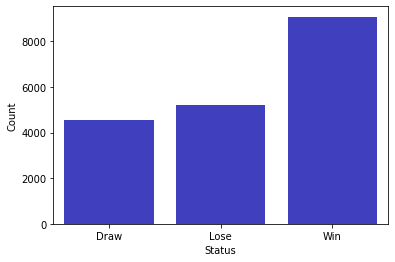

In [345]:
#Since status will be one of of our main variables, I did a plotting just to see it's distribution

sns.countplot(new_df['status'], color='blue',saturation=0.5)
plt.xlabel('Status')
plt.ylabel('Count')

In [346]:
new_df.status.value_counts()

Win     9076
Lose    5186
Draw    4539
Name: status, dtype: int64

Most of the games ended up in wins for the home team.

In [347]:
new_df.corr()

,home_score,away_score,year,home_rank,away_rank
home_score,1.000000,-0.159298,-0.039610,-0.110571,0.294824
away_score,-0.159298,1.000000,-0.007905,0.214722,-0.170168
year,-0.039610,-0.007905,1.000000,0.104008,0.099258
home_rank,-0.110571,0.214722,0.104008,1.000000,0.443969
away_rank,0.294824,-0.170168,0.099258,0.443969,1.000000


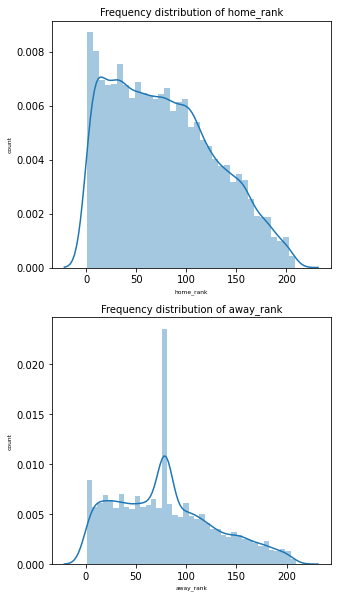

In [348]:
#A plot of frequency distribution
col_names = ['home_rank', 'away_rank']
fig, ax = plt.subplots(len(col_names), figsize=(5,10))

for i, col_val in enumerate(col_names):
  sns.distplot(new_df[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=6)
  ax[i].set_ylabel('count', fontsize=6)



> Measures of central tendency



In [349]:
new_df['home_score'].mean()

1.6179990426041169

In [350]:
new_df['away_score'].mean()

1.0705281633955641

Most of the scores were 1 but the home team had hire mean scores

# Implementing the Solution

In [351]:
#Converting the string data types to values so that we could use them in modelling
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

new_df['home_team'] = en.fit_transform(new_df['home_team'])
new_df['away_team'] = en.fit_transform(new_df['away_team'])

new_df['tournament'] = en.fit_transform(new_df['tournament'])
new_df['year'] = en.fit_transform(new_df['year'])

new_df.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank,status
0,41,161,0,0,27,0,19,67.0,Draw
1,138,8,0,1,27,0,70,5.0,Lose
2,184,63,0,0,27,0,22,35.0,Draw
3,187,29,1,5,27,0,94,8.0,Lose
4,152,231,0,0,27,0,58,25.0,Draw


## Checking for multicollinearity

In [352]:
#Columns to be used for polynomial regression are:
#home_rank, away_rank, tournament, home_score, away_score
df4 = new_df[['home_score', 'tournament', 'home_rank', 'away_rank']]

In [353]:
# Removing the serial and home_score columns, we want to focus on our independent variables only.
independent_only = df4.drop(columns=['home_score'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,tournament,home_rank,away_rank
tournament,1.000000,-0.148431,-0.150899
home_rank,-0.148431,1.000000,0.443969
away_rank,-0.150899,0.443969,1.000000


In [354]:
#Creating VIF for each independent variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,tournament,home_rank,away_rank
tournament,1.032024,0.104677,0.109258
home_rank,0.104677,1.256115,-0.541880
away_rank,0.109258,-0.541880,1.257065




> The VIF score for each variable is found alongside the downwards sloping diagonal. tournament has a score of 1.03, home_rank has a score of 1.256 while away_rank has a score of 1.257


> Away_rank has the highest VIF score so let's see how the VIF scores improve if we remove it






In [355]:
revised = independent_only.drop(columns=['away_rank'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,tournament,home_rank
tournament,1.022528,0.151774
home_rank,0.151774,1.022528




> home_rank has the most significant drop indicating that it had a collinear relation with away_rank



In [356]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = df4['home_score'].values

X_train, X_test, home_train, home_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
home_predict = regressor.predict(X_test)

In [357]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(home_predict, home_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

#residuals.mean()

,0
count,3761.000000
mean,-0.013050
std,1.692388
min,-20.380451
25%,-0.528988
50%,0.460157
75%,1.234501
max,1.928502




> Our min and max for the residual are high. Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 1.3%



## Polynomial Approach



> 1: Predict how many goals the home team scores.



In [358]:
#We can try to predict the home_score given the home rank
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [359]:
df5 = df4[['home_score', 'home_rank']]
df5

,home_score,home_rank
0,0,19
1,0,70
2,0,22
3,1,94
4,0,58
...,...,...
18796,0,27
18797,1,55
18798,0,12
18799,4,7


In [360]:
X = df5.iloc[:, 1:2].values
y = df5.iloc[:, 0:1].values


In [363]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Polynomial prediction: 1




> The accuracy of the model is 100%. There is most likely a case of overfitting





> Cross validating 



In [366]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = df5[['home_rank']].values
y = df5['home_score'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 18801 folds
trained 18801 models


1.1903770378487766



> 2. Predict how many goals the away team scores



In [367]:
#We can try to predict the away_score given the home rank
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [368]:
df6 = new_df[['away_score', 'away_rank']]
df6

,away_score,away_rank
0,0,67.0
1,1,5.0
2,0,35.0
3,5,8.0
4,0,25.0
...,...,...
18796,1,16.0
18797,2,21.0
18798,1,3.0
18799,3,5.0


In [369]:
X = df6.iloc[:, 1:2].values
y = df6.iloc[:, 0:1].values

In [370]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Making preedictions
y_pred = regressor.predict(X_test)

In [371]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Polynomial prediction: 1




> Cross validating the model



In [372]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = df6[['away_rank']].values
y = df6['away_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.2716322210110722

Training model 2
Model 2 Root Mean Squared Error: 1.252058251726776

Training model 3
Model 3 Root Mean Squared Error: 1.301817063300011

Training model 4
Model 4 Root Mean Squared Error: 1.1890982345343561

Training model 5
Model 5 Root Mean Squared Error: 1.1814561869331994


In [373]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = df5[['home_rank']].values
y = df5['home_score'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 18801 folds
trained 18801 models


1.1903770378487766

## Logistic Approach

In [374]:
#Converting the status column to numerical values
status = pd.get_dummies(new_df['status'],drop_first=True)
status.head()

,Lose,Win
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [375]:
# label encoding
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
new_df['status']= label_encoder.fit_transform(new_df['status']) 

new_df['status'].unique()

#Previewing the dataset
new_df.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank,status
0,41,161,0,0,27,0,19,67.0,0
1,138,8,0,1,27,0,70,5.0,1
2,184,63,0,0,27,0,22,35.0,0
3,187,29,1,5,27,0,94,8.0,1
4,152,231,0,0,27,0,58,25.0,0


In [377]:
# Splitting our dataset
#
X = new_df.drop("status",axis=1)
y = new_df["status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [378]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1355,   19,    0],
       [  22, 1532,    0],
       [   2,    0, 2711]])

In [379]:
from sklearn.metrics import accuracy_score
accuracy_score =(y_test, y_pred)
accuracy_score

(509      2
 17290    2
 10198    2
 14717    2
 9106     2
         ..
 17446    1
 8856     2
 7396     0
 15692    0
 7813     2
 Name: status, Length: 5641, dtype: int64,
 array([2, 2, 2, ..., 0, 0, 2], dtype=int64))

In [380]:
accuracy_score= (1355+1532+2711)/len(y_pred)
accuracy_score

0.9923772380783549

In [381]:
# sklearn accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


The model made 3 correct predictions of 1374, 1532 and 2711. It made no wrong prediction. The model gave an accuracy score of 99% and this is clearly a sign of overfitting and so we'll procede and perfom hyperparameter tuning to see if there'll be any change

## Hyperparameter tuning



> I'll use the random search since the dataset is big



In [384]:
# Performing Data Preprocessing
X = new_df.iloc[:, 0:8].values
y = new_df.iloc[:, 8:9].values

# We'll define a sampling distribution for each hyperparameter.

from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [385]:
# Instantiating RandomizedSearchCV object 

from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5)

In [386]:
# Calling the fit method

random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [387]:
# Checking the parameters that return the highest accuracy

best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_split': 2}


In [388]:
# Finding the obtained accuracy
best_result = random_sr.best_score_
print(best_result)

0.999468085106383




> It still brings the 99% accuracy.





> Both the models bring a very high accuracy but the highest Polynomial regression has the higher accuracy. The study should be reviewed with other variables and see if the accuracy will be at around 80%.



# Challenging the solution



> The solution brought almost a perfect model which means that there could be changes that could be made. I could have maybe added the weighted points and previous points. Also, some factors such as injury on players should have been included.



# Follow up Questions



> a). Did we have the right data? Yes. Our data had sufficient number of columns and rows


> b). Do we need other data to answer our questions? Yes. If we'd have data on the number of injuries per team maybe the model results would be different.


> c). Did we have the right question? Yes. The questions were right and could be undertaken.





